In [1]:
from coreLib.dataset import DataSet
data_dir       = "/media/ansary/DriveData/Work/bengalAI/datasets/CraftData/source"
ds=DataSet(data_dir)


#LOG     :All paths found


  0%|          | 0/200840 [00:00<?, ?it/s]

  0%|          | 0/72045 [00:00<?, ?it/s]

#LOG     :Processing Dictionary:/media/ansary/DriveData/Work/bengalAI/datasets/CraftData/source/bangla/dictionary.csv


  0%|          | 0/1059977 [00:00<?, ?it/s]

  0%|          | 0/46101 [00:00<?, ?it/s]

  0%|          | 0/10305 [00:00<?, ?it/s]

#LOG     :converting int labels to string


  0%|          | 0/10305 [00:00<?, ?it/s]

#LOG     :Processing Dictionary:/media/ansary/DriveData/Work/bengalAI/datasets/CraftData/source/english/dictionary.csv


  0%|          | 0/370098 [00:00<?, ?it/s]

  0%|          | 0/5975 [00:00<?, ?it/s]

#LOG     :bangla.graphemes


  0%|          | 0/200840 [00:00<?, ?it/s]

#LOG     :bangla.numbers


  0%|          | 0/72045 [00:00<?, ?it/s]

#LOG     :english.graphemes


  0%|          | 0/46101 [00:00<?, ?it/s]

#LOG     :english.numbers


  0%|          | 0/10305 [00:00<?, ?it/s]

#LOG     :common.symbols


  0%|          | 0/5975 [00:00<?, ?it/s]

#LOG     :bangla.fonts


  0%|          | 0/21 [00:00<?, ?it/s]

#LOG     :english.fonts


  0%|          | 0/2682 [00:00<?, ?it/s]

#LOG     :common.background


  0%|          | 0/982 [00:00<?, ?it/s]

#LOG     :common.noise.random


  0%|          | 0/112763 [00:00<?, ?it/s]

#LOG     :common.noise.sign


  0%|          | 0/3240 [00:00<?, ?it/s]

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2
import numpy as np
df=ds.bangla.graphemes.df
df

,filename,label,img_path
0,Train_23740,র্ন্ত,/media/ansary/DriveData/Work/bengalAI/datasets...
1,Train_101878,স্ত,/media/ansary/DriveData/Work/bengalAI/datasets...
2,Train_5736,ল্ডো,/media/ansary/DriveData/Work/bengalAI/datasets...
3,Train_76463,গা,/media/ansary/DriveData/Work/bengalAI/datasets...
4,Train_158052,দু,/media/ansary/DriveData/Work/bengalAI/datasets...
...,...,...,...
200835,Train_129198,ফ্র্যা,/media/ansary/DriveData/Work/bengalAI/datasets...
200836,Train_175699,মা,/media/ansary/DriveData/Work/bengalAI/datasets...
200837,Train_38444,ঙ্গ,/media/ansary/DriveData/Work/bengalAI/datasets...
200838,Train_27077,দ্ভ,/media/ansary/DriveData/Work/bengalAI/datasets...


# IDEA-1:
* numpy,scipy

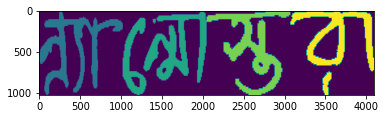

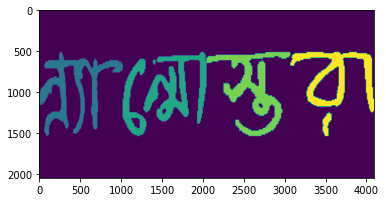

{2: 'ন্ন্যা', 3: 'ন্মো', 4: 'স্ত', 5: 'রা'}


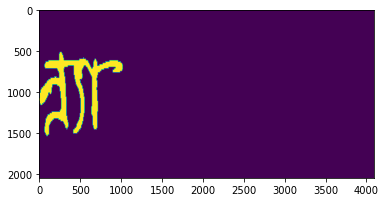

2 ন্ন্যা
bbox:[(512, 1535, 0, 1023)]


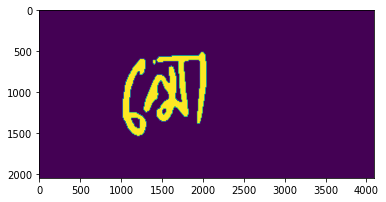

3 ন্মো
bbox:[(512, 1535, 1024, 2047)]


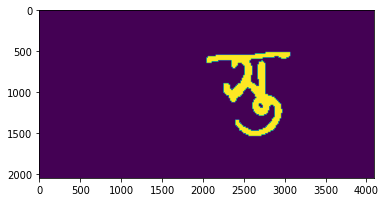

4 স্ত
bbox:[(512, 1535, 2048, 3071)]


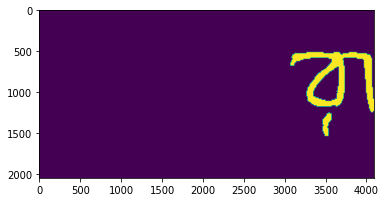

5 রা
bbox:[(512, 1535, 3072, 4095)]


In [25]:
# POC: 
import random
iden=2
num_char=4
imgs=[]
labels={}
h,w=1024,1024
for _ in range(num_char):
    idx=random.randint(0,len(df))
    img_path=df.iloc[idx,2]
    label=df.iloc[idx,1]
    
    img=cv2.imread(img_path,0)
    img=cv2.resize(img,(w,h),fx=0,fy=0, interpolation = cv2.INTER_NEAREST)
    # marking
    img=255-img
    img[img>0]=iden
    #---------------------------------
    
    
    
    
    
    #---------------------------------
    imgs.append(img)
    labels[iden]=label
    iden+=1

img=np.concatenate(imgs,axis=1)
plt.imshow(img)
plt.show()
_h,_w=img.shape
pad=np.zeros((h//2,_w))
img=np.concatenate([pad,img,pad],axis=0)
plt.imshow(img)
plt.show()



print(labels)
for k,v in labels.items():
    back=np.zeros(img.shape)
    back[img==k]=255
    plt.imshow(back)
    plt.show()
    idx = np.where(img==k)
    y_min,y_max,x_min,x_max = np.min(idx[0]), np.max(idx[0]), np.min(idx[1]), np.max(idx[1])
    print(k,v)
    print(f"bbox:[{y_min,y_max,x_min,x_max}]")


# IDEA-2:
* 

In [ ]:
# POC: 
import random
num_char=4
imgs=[]
h,w=128,128
for _ in range(num_char):
    img_path=df.iloc[random.randint(0,len(df)),2]
    img=cv2.imread(img_path,0)
    img=cv2.resize(img,(h,w))
    #---------------------------------
    
    #---------------------------------
    imgs.append(img)

img=np.concatenate(imgs,axis=1)
plt.imshow(img)
plt.show()